<a href="https://colab.research.google.com/github/smlrkh1107/colab_test/blob/housing/colab_practice(housing).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git branch housing

fatal: not a git repository (or any of the parent directories): .git


In [2]:
!pwd
!w
!whoami
!ls -al

/content
 02:12:04 up 32 min,  0 users,  load average: 0.07, 0.02, 0.00
USER     TTY      FROM             LOGIN@   IDLE   JCPU   PCPU WHAT
root
total 1412
drwxr-xr-x 1 root root    4096 Nov 28 01:47 .
drwxr-xr-x 1 root root    4096 Nov 28 01:40 ..
drwxr-xr-x 4 root root    4096 Nov 20 18:06 .config
drwxr-xr-x 2 root root    4096 Nov 28 01:41 dataset
-rw-r--r-- 1 root root 1423529 Nov 28 01:47 housing2.csv
drwxr-xr-x 2 root root    4096 Nov 20 18:17 sample_data


In [3]:
#나에게 할당 된 cpu 약 4기가.
!cat /proc/cpuinfo

processor	: 0
vendor_id	: GenuineIntel
cpu family	: 6
model		: 79
model name	: Intel(R) Xeon(R) CPU @ 2.20GHz
stepping	: 0
microcode	: 0x1
cpu MHz		: 2200.000
cache size	: 56320 KB
physical id	: 0
siblings	: 2
core id		: 0
cpu cores	: 1
apicid		: 0
initial apicid	: 0
fpu		: yes
fpu_exception	: yes
cpuid level	: 13
wp		: yes
flags		: fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology nonstop_tsc cpuid pni pclmulqdq ssse3 fma cx16 sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm abm 3dnowprefetch pti ssbd ibrs ibpb stibp fsgsbase tsc_adjust bmi1 hle avx2 smep bmi2 erms rtm rdseed adx smap xsaveopt arat arch_capabilities
bugs		: cpu_meltdown spectre_v1 spectre_v2 spec_store_bypass l1tf
bogomips	: 4400.00
clflush size	: 64
cache_alignment	: 64
address sizes	: 46 bits physical, 48 bits virtual
power management:

processor	: 1
vendor_id	: Genuin

In [4]:
#나에게 할당된 메모리  12G정도?
!cat /proc/meminfo

MemTotal:       13335212 kB
MemFree:        11562396 kB
MemAvailable:   12687104 kB
Buffers:           47432 kB
Cached:          1237520 kB
SwapCached:            0 kB
Active:           462500 kB
Inactive:        1114248 kB
Active(anon):     253568 kB
Inactive(anon):      312 kB
Active(file):     208932 kB
Inactive(file):  1113936 kB
Unevictable:           0 kB
Mlocked:               0 kB
SwapTotal:             0 kB
SwapFree:              0 kB
Dirty:               696 kB
Writeback:             0 kB
AnonPages:        291840 kB
Mapped:           160744 kB
Shmem:               796 kB
Slab:             113368 kB
SReclaimable:      87000 kB
SUnreclaim:        26368 kB
KernelStack:        3376 kB
PageTables:         4560 kB
NFS_Unstable:          0 kB
Bounce:                0 kB
WritebackTmp:          0 kB
CommitLimit:     6667604 kB
Committed_AS:    1722288 kB
VmallocTotal:   34359738367 kB
VmallocUsed:           0 kB
VmallocChunk:          0 kB
AnonHugePages:         0 kB
ShmemHugePages:  

In [5]:
#gits에 코드 오지게떠서 일단 주석처리!
#코랩에 내 컴퓨터에 있는 파일 업로드 !! 버튼뜸.
from google.colab import files
files.upload();

Saving housing.csv to housing.csv


In [6]:
!ls -al

total 2804
drwxr-xr-x 1 root root    4096 Nov 28 02:12 .
drwxr-xr-x 1 root root    4096 Nov 28 01:40 ..
drwxr-xr-x 4 root root    4096 Nov 20 18:06 .config
drwxr-xr-x 2 root root    4096 Nov 28 01:41 dataset
-rw-r--r-- 1 root root 1423529 Nov 28 01:47 housing2.csv
-rw-r--r-- 1 root root 1423529 Nov 28 02:12 housing.csv
drwxr-xr-x 2 root root    4096 Nov 20 18:17 sample_data


In [0]:
import os
import tarfile
from six.moves import urllib

DATA_DIR="./dataset"

In [8]:
#디렉토리 생성
if not os.path.isdir(DATA_DIR):
  os.makedirs(DATA_DIR)

  
#housing.tgz 다운로드 (gz으로묶고 tar로푼거??)
DATA_PATH = os.path.join(DATA_DIR,'housing.tgz')
urllib.request.urlretrieve('http://raw.githubusercontent.com/ageron/handson-ml/master/datasets/housing/housing.tgz',DATA_PATH)

('./dataset/housing.tgz', <http.client.HTTPMessage at 0x7f490c06e198>)

In [0]:
#압축풀기
tgz_file = tarfile.open(DATA_PATH)
tgz_file.extractall(path=DATA_DIR)
tgz_file.close()

In [0]:
#CSV읽기
import pandas as pd
def load_data(file_dir=DATA_DIR):
  csv_file=os.path.join(file_dir,'housing.csv')
  return pd.read_csv(csv_file)

housing = load_data()

In [11]:
type(housing)

pandas.core.frame.DataFrame

In [12]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [13]:
#파일 이름변경 (업로드한 애)
!mv housing.csv housing2.csv
!pwd
!ls

/content
dataset  housing2.csv  sample_data


In [14]:
housing2 = pd.read_csv('housing2.csv')
housing2.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [15]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [16]:
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [17]:
#수치형 변수 요약 (기초통계량)
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [18]:
%matplotlib inline #코드이상없이 그림이 화면에 안나타 날 때, 해당 라이브러리로 그림을 불러오는 기능.

import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))
plt.show()

UsageError: unrecognized arguments: #코드이상없이 그림이 화면에 안나타 날 때, 해당 라이브러리로 그림을 불러오는 기능.


In [19]:
from sklearn.model_selection import train_test_split

#train:test = 80:20
#test 데이터를 학습기간에 절 대 보면 안돼
#1epok = 트레인 데이터를 한 번 전체 훑는 것
#train에서 또 80:20으로 나누고, train 20에서 1에포크를 완료할때 마다 시험하기. ==> 과적합 막기
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)   #random_state 를 안적으면 매번 테스트와 트레이닝을 뒤바뀌어 분류하기 때문에 불러올 때마다 똑같이 분류하라고 적어주는 것.
print ("train : {}, test : {}".format(len(train_set),len(test_set)))

train : 16512, test : 4128


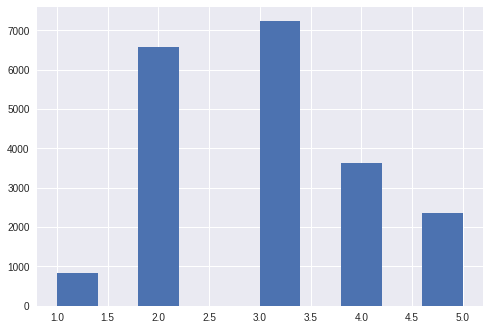

In [20]:
#소득의 카테고리 만들기
import numpy as np

#1.5 : 소득 카테고리 수를 제한하기 위한 값 (없던컬럼 자연스레 생성~~)
housing["income_cat"] = np.ceil(housing["median_income"]/1.5) #ceil은 무조건 올림 (반올림x올림)

#5이상인 값은 5로 합침
housing["income_cat"].where(housing["income_cat"] < 5, 5.0, inplace=True) #5미만이 아닌 것들은(false) 5로 고정해라

#히스토그램
housing["income_cat"].hist()


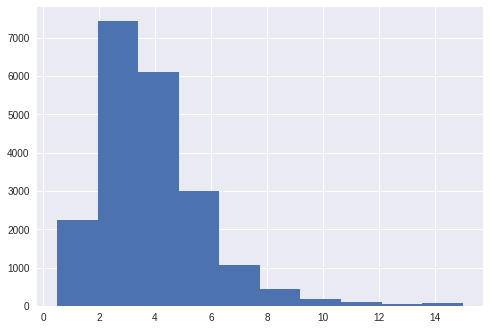

In [21]:
##########
#np.ceil안한 모양! 최대값도 지정안해줬을 때! 
housing["median_income"].hist()

In [0]:
#계층 샘플링
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in split.split(housing, housing["income_cat"]):
  strat_train_set = housing.loc[train_index]
  strat_test_set  = housing.loc[test_index]  

In [23]:
#소득 카테고리 (총 수) 살펴보기
housing["income_cat"].value_counts()

3.0    7236
2.0    6581
4.0    3639
5.0    2362
1.0     822
Name: income_cat, dtype: int64

In [24]:
#소득 카테고리 (비율) 살펴보기
pro=housing["income_cat"].value_counts() / len(housing)
pro

3.0    0.350581
2.0    0.318847
4.0    0.176308
5.0    0.114438
1.0    0.039826
Name: income_cat, dtype: float64

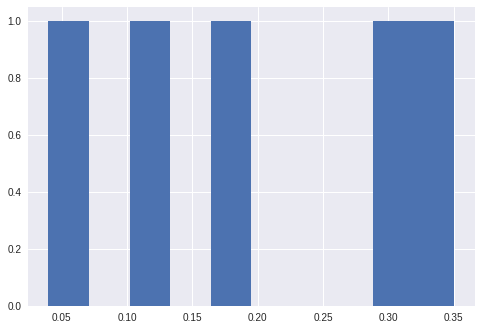

In [25]:
#x축과 y축을 변경하고싶다...ㅠ
## x축 순서도 1.0 2.0 3.0 4.0 5.0순으로 하고싶다!!!!!!!!!!!!
pro.hist()

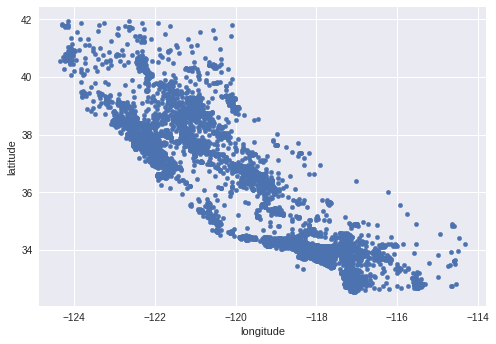

In [26]:
#훈련 데이터 복사 (원본데이터를 건들지 않기 위해)
housing = strat_train_set.copy()

#위도, 경도에 따른 산점도 그리기
housing.plot(kind="scatter",x="longitude",y="latitude")

In [27]:
#어디 패키지인지 알아보고 plot 함수를 알아보는것이다...!
type(housing)

pandas.core.frame.DataFrame

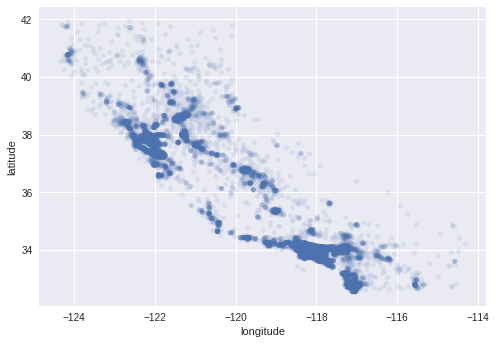

In [28]:
#밀집지역은 더 진하게 표현
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1 )
######서울지도 gps를 가지고 집이 밀집된거 플랏 그려보면 good

#matplotlib에서 plot함수를 이용한것 ~~~~~ 더 추가 함수를 알고싶다면 무슨 라이브러리인지도 확실히 알아둬야 함!

In [29]:

#주택가격 표시하기
#원의크기(s) : 구역의 인구 / 색(c) : 주택가격 / 컬러 맵 (cmap):jet (저) 파랑---> 빨강 (고)

housing.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4,
             s=housing["population"]/100, #수식을 사용하기 위해 한 번더 변수를 지정해줌 [] 나머지는 housing.plot에 묶여 선언을 다시 안해주어도 됨.
             label="population", figsize=(10,7),
             c="median_house_value", 
             cmap=plt.get_cmap("jet"),
             colorbar=True, sharex=False)

plt.legend()


#[탐색]
#해안가일 수록 값이 비싸다는 것을 시각화 자료를 통해 알 수 있다.(빨간색분포)
#클러스터링 알고리즘사용
#그러나, 북부해안가는 값이 그리 높지 않다는 것도 알 수 있음. ==> 다른 방안을 찾아보아야 함


NameError: ignored

In [30]:
#상관계수 표
housing.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,income_cat
longitude,1.000000,-0.924478,-0.105848,0.048871,0.076598,0.108030,0.063070,-0.019583,-0.047432,-0.016243
latitude,-0.924478,1.000000,0.005766,-0.039184,-0.072419,-0.115222,-0.077647,-0.075205,-0.142724,-0.078848
housing_median_age,-0.105848,0.005766,1.000000,-0.364509,-0.325047,-0.298710,-0.306428,-0.111360,0.114110,-0.139385
total_rooms,0.048871,-0.039184,-0.364509,1.000000,0.929379,0.855109,0.918392,0.200087,0.135097,0.221690
total_bedrooms,0.076598,-0.072419,-0.325047,0.929379,1.000000,0.876320,0.980170,-0.009740,0.047689,0.012502
population,0.108030,-0.115222,-0.298710,0.855109,0.876320,1.000000,0.904637,0.002380,-0.026920,0.022848
households,0.063070,-0.077647,-0.306428,0.918392,0.980170,0.904637,1.000000,0.010781,0.064506,0.034995
median_income,-0.019583,-0.075205,-0.111360,0.200087,-0.009740,0.002380,0.010781,1.000000,0.687160,0.902156
median_house_value,-0.047432,-0.142724,0.114110,0.135097,0.047689,-0.026920,0.064506,0.687160,1.000000,0.642274
income_cat,-0.016243,-0.078848,-0.139385,0.221690,0.012502,0.022848,0.034995,0.902156,0.642274,1.000000


In [31]:
#집값을 중심으로 한 상관계수 
#상관계수가 매우 낮은 변수들은 계산시간 단축을 위해 제거를 추천한다.
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False) #sort_values / ascending = 내림차순

median_house_value    1.000000
median_income         0.687160
income_cat            0.642274
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f49068d5898>,
      dtype=object)

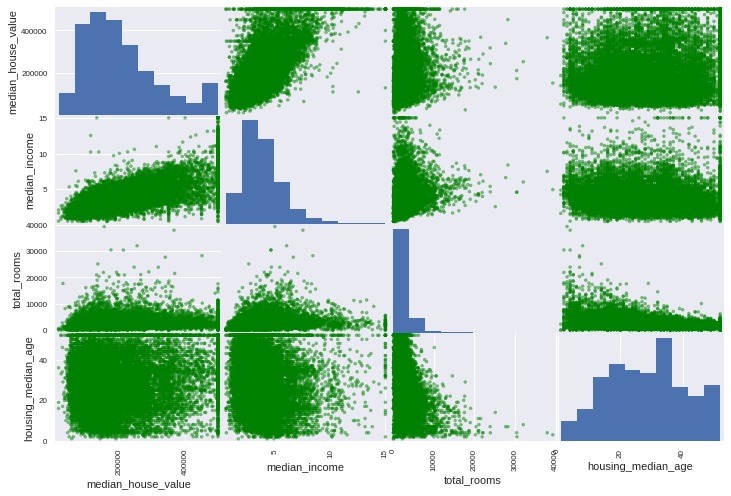

In [32]:
#상관계수가 어느정도 의미있게 나온 변수들만 추려냄 (attributes)
from pandas.plotting import scatter_matrix





attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]

scatter_matrix(housing[attributes],figsize=(12,8), color="green") #alpha조절가능

#상관계수가 작을수록 선형(1차식)관계가 뚜렷하지 않은 것을 볼 수 있음.

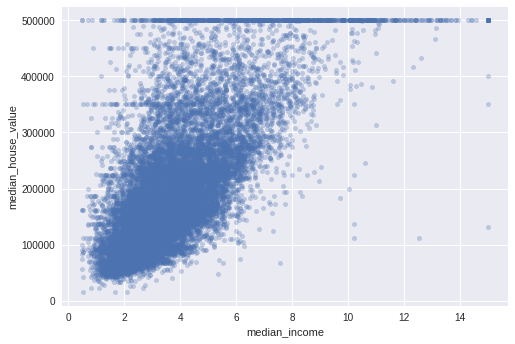

In [33]:
housing.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.3)
#집값 50만 이상은 일렬 = 자료조사를 안했던지 등 이유가 존재
#제거하는것도 나쁘지 않아 보임.

In [0]:
#방 수  ==> 가구당 방 수
#침대 수 ==> 방 갯수 대비 침대 수
#인구    ==> 가구 수에 대한 인구 수
housing["room_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedroom_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"] = housing["population"]/housing["households"]

In [35]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)
#bedroom_per_room 이 약간의 음의상관관계를 갖는다는 것을 알 수 있음.

median_house_value          1.000000
median_income               0.687160
income_cat                  0.642274
room_per_household          0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedroom_per_room           -0.259984
Name: median_house_value, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4906426668>,
      dtype=object)

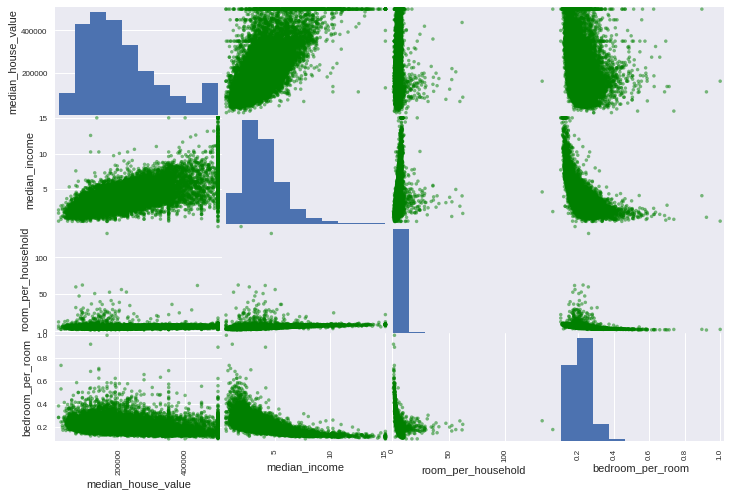

In [36]:
from pandas.plotting import scatter_matrix

attributes=["median_house_value","median_income","room_per_household","bedroom_per_room"]
scatter_matrix(housing[attributes], figsize=(12,8), color="green")

#attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
#scatter_matrix(housing[attributes],figsize=(12,8), color="green") #alpha조절가능

In [37]:
#행삭제 : dropna()
#열삭제 : drop()
#특정 값으로 채우기 (0,평균값, 중간값..) : fillna()


#훈련 데이터 복사
housing = strat_train_set.drop("median_house_value",axis=1)
housing_labels = strat_train_set["median_house_value"].copy()
housing.count()

longitude             16512
latitude              16512
housing_median_age    16512
total_rooms           16512
total_bedrooms        16354
population            16512
households            16512
median_income         16512
ocean_proximity       16512
income_cat            16512
dtype: int64

In [38]:
#특정값으로 채움
median = housing["total_bedrooms"].median()
housing["total_bedrooms"].fillna(median, inplace=True)
housing.count()

longitude             16512
latitude              16512
housing_median_age    16512
total_rooms           16512
total_bedrooms        16512
population            16512
households            16512
median_income         16512
ocean_proximity       16512
income_cat            16512
dtype: int64

In [39]:
#해당 구역을 제거
housing2 = housing.dropna(subset=['total_bedrooms'])
housing2.count()

longitude             16512
latitude              16512
housing_median_age    16512
total_rooms           16512
total_bedrooms        16512
population            16512
households            16512
median_income         16512
ocean_proximity       16512
income_cat            16512
dtype: int64

In [40]:
#전체 특성을 삭제
housing2 = housing.drop("total_bedrooms",axis=1)
housing2.count()

longitude             16512
latitude              16512
housing_median_age    16512
total_rooms           16512
population            16512
households            16512
median_income         16512
ocean_proximity       16512
income_cat            16512
dtype: int64

In [0]:
#Imputer  누락된 값에 대한 처리
from sklearn.preprocessing import Imputer

#중간값으로 대체하는 객체 생성
imputer = Imputer(strategy="median")

#수치형 데이터만 선택
housing_num = housing.drop("ocean_proximity", axis=1)
type(housing_num)

#학습 및 변환 (fit학습후 학습한 결과 저장transform ) : X는 null값이 없다. = 중간값으로 대체.(imputer사용시 편리 모르면 #특정값으로 채움#을 보자)
imputer.fit(housing_num)
X = imputer.transform(housing_num)

In [42]:
#pandas DataFrame으로 변환
type(X)

numpy.ndarray

In [43]:
#데이터 프레임으로 변환
housing_df = pd.DataFrame(X, columns=housing_num.columns, index=list(housing.index.values))

type(housing_df)

pandas.core.frame.DataFrame

In [44]:
housing_df.count()

longitude             16512
latitude              16512
housing_median_age    16512
total_rooms           16512
total_bedrooms        16512
population            16512
households            16512
median_income         16512
income_cat            16512
dtype: int64

In [45]:
#ocean_proximity는 범주형으로 중간값을 계산하여 채워넣을 수 없다.
#카테고리텍스트를 숫자로 바꿔 사용
housing_cat = housing["ocean_proximity"]
housing_cat.head(10)

17606     <1H OCEAN
18632     <1H OCEAN
14650    NEAR OCEAN
3230         INLAND
3555      <1H OCEAN
19480        INLAND
8879      <1H OCEAN
13685        INLAND
4937      <1H OCEAN
4861      <1H OCEAN
Name: ocean_proximity, dtype: object

In [46]:
#pd.factorize() 카테고리를 정수값으로 매핑!
#사전을 만들어줌. index에나오는 순서대로 0,1,2,3
#단, 가까이 있는 두 값이 더 비슷하다고 생각하기 때문에 one-hot-encoding을 사용해주면 된다.
housing_cat.factorize()

(array([0, 0, 1, ..., 2, 0, 3]),
 Index(['<1H OCEAN', 'NEAR OCEAN', 'INLAND', 'NEAR BAY', 'ISLAND'], dtype='object'))

In [47]:
housing_cat_encoded, housing_categories = housing_cat.factorize()
housing_cat_encoded[:10]

array([0, 0, 1, 2, 0, 2, 0, 2, 0, 0])

In [48]:
housing_categories

Index(['<1H OCEAN', 'NEAR OCEAN', 'INLAND', 'NEAR BAY', 'ISLAND'], dtype='object')

In [49]:
#one-hot-encoding : 숫자로 된 범주형을 원-핫 벡터로 변환
#카테고리별 이진 특성을 만들어냄
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()

#fit_transform()에는 2차원 배열을 넣어야 함  (-1(행) : n개의 데이터를 받겠다. 제한x , 1(열) : 1차원으로 받겠다.)
housing_cat_1hot = encoder.fit_transform(housing_cat_encoded.reshape(-1,1))

#출력은 sparse matrix(scipy.sparse.csr.csr_matrix) : [1,0,0,0, .. ,0 ]이렇게 행마다 저장하면 메모리를 잡아먹으므로
#위치만 저장하여 메모리를 줄일 수 있음.
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [55]:
#shape : (16512, 5)
housing_cat_1hot.toarray()

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [51]:
#2차원(DataFrame) : reshape(-1,1)과 같은 효과
housing_cat_2d = housing[["ocean_proximity"]]

#default : sparse = True
cat_encoder = OneHotEncoder(sparse=False)
housing_cat_1hot = cat_encoder.fit_transform(housing_cat_2d)
housing_cat_1hot

ValueError: ignored

In [0]:
#[[특성스케일링]]
#> 입력값들의 스케일이 크게 다르면 알고리즘이 잘 작동되지 않음.
#> 정규화를 함 : 모든 특성범위를 같게 만듦 / min-max가 0~1사이값을 가지게 됨 : sklearn.MinMaxScaler()
#> 표준화 : 평균이0, 분산이1 : sklearn.StandardScaer




#Pipeline : 연속된 변환을 순서대로 처리할 수 있도록 도와줌
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([('imputer', Imputer(strategy="median")), ('scaler',StandardScaler()),])
housing_num_tr = num_pipeline.fit_transform(housing_num)

In [54]:
from sklearn.compose import ColumnTransformer

num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([("num", num_pipeline, num_attribs), ("cat", OneHotEncoder(), cat_attribs), ])

housing_prepared = full_pipeline.fit_transform(housing)
housing_prepared.shape

ModuleNotFoundError: ignored

In [56]:
#선형회귀 모델
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()

#학습
lin_reg.fit(housing_prepared, housing_labels)

#예측
sample_data = housing.iloc[:5]
sample_labels = housing_labels.iloc[:5]
sample_data_prepared = full_pipeline.transform(sample_data)
print("predict:\n{}".format(lin_reg.predict(sample_data_prepared)))
print("target:\n{}".format(list(sample_labels)))

NameError: ignored

In [59]:
from sklearn.metrics import mean_squared_error
housing_predict = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predict)
lin_rmse = np.sqrt(lin.mse)
lin_rmse

NameError: ignored